# Introduction

## Double Slit Experiment

The "double slit experiment" is a key step in understanding where quantum mechanics arises from and in understanding the concept of the quantum state of the system.

In 1801 Thomas Young demonstrated that light behaves like a wave with the following experimental setup.

<p align="center">
  <img src="images/Screenshot_2025-09-17_163549.png" alt="Double slit setup" width="60%">
</p>

The setup consists of a wall with two narrow slits and an absorber screen that can detect, at each point of the screen, the intensity of the incident light. What characterizes the wave behavior of light is the distribution of intensity across the screen, which forms an interference pattern (c). If we now repeat the experiment with a source of electrons, we get the same interference pattern on the absorber screen; however, this seems strange because if we think of electrons as microscopic balls, we are led to expect the following distribution:

<p align="center">
  <img src="images/Screenshot_2025-09-17_165022.png" alt="Classical expectation" width="25%">
</p>

In this case we talk about probability because we measure how many electrons hit each point on the screen out of the total. $P_1$ is the probability of an electron passing through the first slit, while $P_2$ is the probability of passing through the second slit; classically the total probability would be the sum:  
$P_{12} = P_1 + P_2$  
Thinking of electrons as microscopic balls we are also led to think that each electron either goes through slit 1 or slit 2. Yet, experimentally, what we observe is very different; each electron, even when sent one at a time, contributes to an interference pattern—as if it passed through both slits.

To test this idea we try to determine “which path” the electron takes.

<p align="center">
  <img src="images/light.png" alt="Which-path detection" width="55%">
</p>

We add a very strong light source placed behind the wall and between the two slits. When an electron passes on its way to the detector, it scatters light so we can see where it goes. Observation: every time an electron hits the detector screen we see a flash either near slit 1 or slit 2—never both. The distribution on the screen now corresponds to the classical sum $P_{12} = P_1 + P_2$. When we turn off the light, the interference pattern is restored.

This suggests that observing (measuring) the path alters the outcome. Perhaps the light “disturbs” the electrons. If we use gentler (lower frequency, longer wavelength) light, we can no longer accurately tell which slit the electron passed through; in that case the interference pattern reappears.

**Conclusion:** If the apparatus is capable of determining whether electrons go through slit 1 or slit 2, then we obtain outcomes consistent with “either slit 1 or slit 2” and no interference. When we do not (and cannot) determine the path, and nothing in the experiment disturbs the electrons, we may not say the electron went through only one slit—the interference pattern emerges.

# Quantum Gates
So far you are familiar with classical gates, however in quantum computing we need to use other gates. Thus in this lecture, quantum gates and circuits will be explained. We will go over the most basic operations and how they can be implemented in [QISKIT](https://github.com/Qiskit/qiskit). QISKIT is an open-source quantum computing software development framework for leveraging today's quantum processors in research, education, and business. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices and simulators.

In [1]:
import qiskit
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

## Gate operators
To show how different quantum principles can be simulated, we need some understanding of quantum gates. Now we will see how to implement these principles in QISKIT. First, you need to install the QISKIT library.


In [2]:
# To create a single qubit we can use the following
single_qubit = qiskit.QuantumCircuit(1)

### Hadamard Gate
There are a lot of different gates that we can simulate using QISKIT. The most basic one is the Hadamard gate. The Hadamard gate is a one-qubit operation that maps the basis state $\ket{0}$ to the superposition state $\frac{|0⟩ + |1⟩}{\sqrt{2}}$ and the basis state $\ket{1}$ to the superposition state $\frac{|0⟩ - |1⟩}{\sqrt{2}}$. In other words, it takes a qubit in the state $\ket{0}$ or $\ket{1}$ and puts it into an equal superposition of both states.


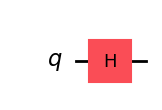

In [3]:
hadamard_qubit = QuantumCircuit(1) # Create a quantum circuit with one qubit
hadamard_qubit.h(0) # Apply Hadamard gate to qubit 0
hadamard_qubit.draw('mpl') # Draw the circuit

### Rotation Gates
Another important gate is the rotation gate. The rotation gate is a one-qubit operation that rotates the state of a qubit around the Bloch sphere. There are three types of rotation gates: Rx, Ry, and Rz. The Rx gate rotates the qubit around the x-axis, the Ry gate rotates the qubit around the y-axis, and the Rz gate rotates the qubit around the z-axis. These gates can be very useful for example to create a bias in a qubit. Maybe you want to represent a coin that has a higher chance of landing on heads. To do this you can actually apply a rotation gate after the Hadamard gate. To rotation can be represented as a mathematical operator:
$$
R_x(\theta)= \begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2}) \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix} \quad
R_y(\theta)= \begin{bmatrix} cos(\frac{\theta}{2}) & sin(\frac{\theta}{2}) \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix} \quad
R_z(\theta)= \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}
$$


From these gates we can see that the $R_y$ gate is solely changing the amplitude, which result to the probability. $R_z$ is only changing the phase and $R_x$ is both changing the phase and the amplitude at the same time.

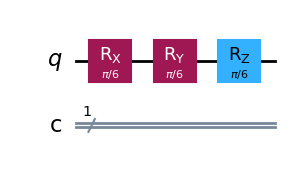

In [4]:
# These gates can simply be implemented in QISKIT:
r_qc = QuantumCircuit(1,1)
r_qc.rx(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.ry(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.rz(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.draw('mpl')

#### Pauli Gates
Pauli gates are a very useful example of the rotation gates. Also the pauli gates are present in both the x, y and z direction. The Pauli x-gate is the equivalent of a classical not gate. The Pauli y-gate is a combination of a bit and phase flip. Lastly the Pauli z-gate is a phase flip. The mathematical representation of these gates are:
$$ \sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \quad
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$
As can be seen these pauli gates are just the rotation gates, but than for $\theta= \pi$. However, in literature they are always referred to as simply pauli gates.

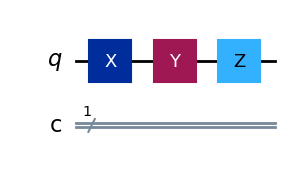

In [5]:
sigma_qc = QuantumCircuit(1,1)
sigma_qc.x(0)   # Pauli x-gate on qubit 0
sigma_qc.y(0)   # Pauli y-gate on qubit 0
sigma_qc.z(0)   # Pauli z-gate on qubit 0
sigma_qc.draw('mpl')

## Simulating Quantum principles


### Simulation
In QISKIT it is possible to create different simulations. For our case we want to work with real data and outcomes. Thus we will use the AerSimulator to simulate our quantum circuits. In the following code you will how we must initialize the simulator and run a simple circuit with a Hadamard gate and a measurement.

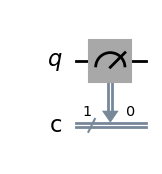

In [6]:
def simulate(quantum_circuit=None):
    ## Initialize the simulator
    sim = AerSimulator()

    ## Generates a transpiled version of the quantum circuit that is optimized for the specified backend (simulator in this case)
    tqc = transpile(quantum_circuit, sim)
    ## Run the simulation with 1000 shots (repetitions) to get a distribution of results
    result = sim.run(tqc, shots=1000).result()
    return result



## create a quantum circuit with one qubit
qc = QuantumCircuit(1, 1)

## Before measuring you can apply a certain gate
## With the qc.measure function we can measure the qubit and the result can be stored in a 'classical' bit
qc.measure(0, 0)

qc.draw('mpl')

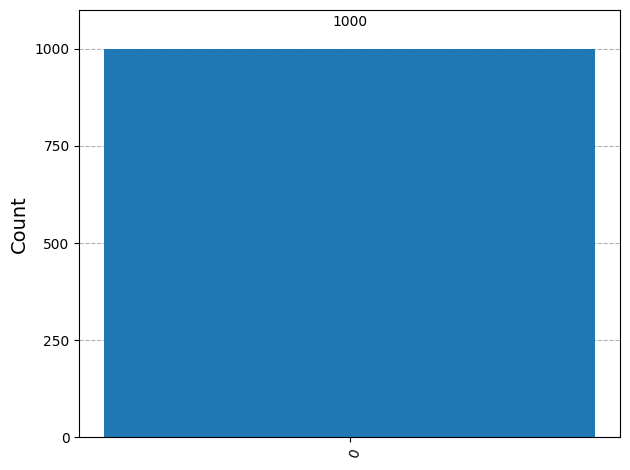

In [7]:
plot_histogram(simulate(qc).get_counts())

# Superposition

From the double-slit experiment we are led to think that what truly characterizes the state of the physical system is the probability distribution of the possible outcomes. We then need some practical mathematical tools to describe the states that characterize our physical system. From our experiment, these tools should be exclusive and exhaustive: each of them corresponds to a distinct result of a measurement (exclusive) and their entire set corresponds to all possible results (exhaustive).

A particular state x of the system is described by a symbol, namely a "ket", represented by the notation $\ket{x}$ (Dirac notation). In the double slit experiment, the measurement of the electron through slit 1 or slit 2 can be described by two basis states:

- $\ket{1}$ corresponds to the electron passing through slit 1  
- $\ket{2}$ corresponds to the electron passing through slit 2  

However, if we don't measure the electrons, the system can be in a general **superposition** of the two states, which is a linear combination:
$$\ket{\psi} = \alpha \ket{1} + \beta \ket{2}$$

Because kets describe exclusive and exhaustive states, we interpret them as basis vectors. This suggests introducing an inner product:
$$\braket{\phi|\psi}$$

With respect to this inner product, for an orthonormal basis formed by our two states we have:
$$\braket{1|1} = \braket{2|2} = 1$$
$$\braket{2|1} = \braket{1|2} = 0$$

# Measurements

We have seen that a closed quantum system will evolve according to a unitary evolution operator. However, there must come a time that the experimentalist will need to check some kind of result. In order to check, we need the experimentalist equipment (an external physical system), which will check "what is happening".

**Measurement postulate:**  
Quantum measurements are described by a collection $\{M_m\}$ of *measurement operators*. These are operators acting on the state space of the system being measured. The index $m$ refers to the measurement outcomes that may occur in the experiment. If the state of the quantum system is $\ket{\psi}$ immediately before the measurement then the probability that result $m$ occurs is given by:
$$p(m) = \bra{\psi} M^\dagger_m M_m \ket{\psi}$$
and the state of the system after the measurement is
$$\ket{\psi'} = \frac{M_m \ket{\psi}}{\sqrt{\bra{\psi} M^\dagger_m M_m \ket{\psi}}}$$
The measurement operators satisfy the completeness equation:
$$\sum_m M^\dagger_m M_m = I$$
The completeness equation expresses the fact that probabilities sum to one:
$$1 = \sum_m p(m) = \sum_m \bra{\psi} M^\dagger_m M_m \ket{\psi}$$
This equation being satisfied for all $\ket{\psi}$ is equivalent to the completeness equation. However, the completeness equation is much easier to check directly, so that’s why it appears in the statement of the postulate.

Although this is the broadest definition, it is not as intuitive as we would like. In addition, it is not the common framework when we talk about measurements. As a result, we will present the special case that is the most commonly used, which is the *projective* or *von Neumann* measurement.

**Projective Measurement:** For a given orthonormal basis $B = \{\ket{\varphi_i}\}$ of a state space $\mathcal{H_A}$ for a system $A$, it is possible to perform a projective measurement on system $\mathcal{H_A}$ with respect to the basis $B$ that, given a state
$$\ket{\psi} = \sum_j \alpha_j \ket{\varphi_j},$$
outputs a **label $i$** with **probability $|\alpha_i|^2$** and **leaves the system in state $\ket{\varphi_i}$** (the state “collapses” to $\ket{\varphi_i}$). Moreover, a projective measurement can be described by an observable $M$ with spectral decomposition
$$M = \sum_m m P_m$$
where $P_m$ is the projector onto the eigenspace of $M$ with eigenvalue $m$.

For example, if we want to define a projection operator in basis $B$, then $P_j = \ket{\varphi_j}\bra{\varphi_j}$. We can check that $P_j^\dagger P_j = P_j$ and $\sum_j P_j = I$ due to the completeness relation $\sum_j \ket{\varphi_j}\bra{\varphi_j} = I$. Therefore, the collection $\{P_j\}$ is a projective measurement, consistent with the postulate defined previously.

You can notice that $\alpha_j = \braket{\varphi_j|\psi}$ since $\ket{\psi} = \sum_j \ket{\varphi_j}\braket{\varphi_j|\psi}$. Additionally,
$$|\alpha_i|^2 = \alpha_i^* \alpha_i = \braket{\psi|\varphi_i}\braket{\varphi_i|\psi} = \bra{\psi} P_i \ket{\psi} = \bra{\psi} P_i^\dagger P_i \ket{\psi} = p(i),$$
which means that the probability of getting the outcome $\ket{\varphi_j}$ is $|\alpha_j|^2$. After the measurement, the state collapses to $\dfrac{P_m \ket{\psi}}{\sqrt{p(m)}}$.

Let us consider the following example. We have a superposition of states in the basis $\{\ket{0}, \ket{1}, \ket{2}\}$:
$$\ket{\psi} = \sqrt{\frac{1}{11}}\ket{0} + \sqrt{\frac{7}{11}}\ket{1} + \sqrt{\frac{3}{11}}\ket{2}.$$
The probability of getting the label $1$ as a measurement outcome is $\dfrac{7}{11}$, implying that after that the initial state will collapse to $\ket{1}$.

### Measuring Superposition
Now that we have seen the quantum principle of superposition and how this is related to measurements, we can go through two excercises: the first one is theoretical in order to help you better understand how probabilities are computed, while in the second one you are requested with a more "hands-on" approach. 


<div style="margin:1.2em 0; background:#f8fafc; color:#111827; border:1px solid #cbd5e1; border-radius:10px; padding:16px 20px; font-size:15.5px; line-height:1.55; font-family:Segoe UI, Roboto, sans-serif;">

  <div style="font-weight:700; color:#1e293b; margin-bottom:.5rem; font-size:16.5px;">
    📌 Exercise #1 - Double slit experiment
  </div>

  Consider a particle that can go through two slits.  
  We denote the state ∣1⟩ as "the particle passed through the first slit" and ∣2⟩ as "the particle passed through the second slit."  

  As we have seen, the most general state of the particle is:  
  $$\lvert \psi\rangle = \alpha\lvert 1\rangle + \beta\lvert 2\rangle$$

  1. Write down the probability of finding the particle in state ∣1⟩.
  2. Write down the probability of finding the particle in state ∣2⟩.
  3. Suppose we instead measure in the basis  

     $$
     \lvert +\rangle = \tfrac{1}{\sqrt{2}}(\lvert 1\rangle + \lvert 2\rangle), \quad
     \lvert -\rangle = \tfrac{1}{\sqrt{2}}(\lvert 1\rangle - \lvert 2\rangle)
     $$

     What are the probabilities of ∣+⟩ and ∣-⟩?

</div>







<details style="margin:1.2em 0; border:1px solid #cbd5e1; border-radius:10px; overflow:hidden; font-family:Segoe UI, Roboto, sans-serif;">
  <summary style="cursor:pointer; padding:10px 14px; background:#e2e8f0; color:#1e293b; font-weight:600; font-size:15px;">
    Need some help? <i>Click for a hint</i>
  </summary>
  <div style="padding:12px 16px; background:#f8fafc; color:#111827; font-size:14.5px; line-height:1.55;">
    Remember how probability is definined and the inner product between basis states (∣1⟩ and ∣2⟩ are orthogonal!).
  
  </div>
</details>

<div style="margin:1.2em 0; background:#f8fafc; color:#111827; border:1px solid #cbd5e1; border-radius:10px; padding:16px 20px; font-size:15.5px; line-height:1.55; font-family:Segoe UI, Roboto, sans-serif;">

  <div style="font-weight:700; color:#1e293b; margin-bottom:.5rem; font-size:16.5px;">
    📌 Exercise #2 - Measuring in QISKIT
  </div>

  In this excercise you are asked to simulate in QISKIT a measure process through the tools you learned before.

  1. Create a quantum circuit with one qubit.
  2. Apply the Hadamard gate taught before and measure the qubit.
  3. Use the simulate function.
  4. Plot the result and draw the circuit

</div>

#### 'Introducing bias'
As taught before we have other gates that can rotate the states, which will make some states more favorable. In the following code you must try to create a coin that is 75% biased to land on heads, (let heads be the $\ket{0}$ and tails $\ket{1}$). Then plot the results, from the results it must be seen that it will be a distribution of 750 heads and 250 tails.
<details>
  <summary>💡 Hint</summary>
  Go and look for the rotation qubit and how rotating it works. Then think about how you can create a phase that will result in a 75% chance for heads.
</details>

#### Bonus 'Flipping the coin'
As a bonus try to create the qiskit implementation of flipping this coin and then plot the results again.

# Entanglement

Until now, we have only considered one isolated quantum system, call it $\mathcal{H}_A$, which (in the quantum computing framework) has computational basis $\{\ket{0}, \ket{1}\}$ defining a qubit. However, we can also have more than one quantum system whose qubits **interact** with each other. As a result, we can treat the composite as one combined system.

When two physical systems are treated as a single combined system, the state space is the tensor product space $\mathcal{H}_A \otimes \mathcal{H}_B$ of the component spaces. If the first system is in state $\ket{\psi_1}$ and the second in state $\ket{\psi_2}$, then the combined system is
$$\ket{\psi_1} \otimes \ket{\psi_2} = \ket{\psi_1}\ket{\psi_2}.$$

In the quantum computing setting, if each subsystem has computational basis $\{\ket{0}, \ket{1}\}$, then the combined system $\mathcal{H}_A \otimes \mathcal{H}_B$ has basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$.

Composite systems allow us to define one of the most interesting and puzzling phenomena: **entanglement**. The most well-known entangled (Bell) states are:
$$
\begin{aligned}
\ket{\beta_{00}} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \\
\ket{\beta_{01}} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \\
\ket{\beta_{10}} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\
\ket{\beta_{11}} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}}
\end{aligned}
$$

These states cannot be written as a product $\ket{\psi_1}\ket{\psi_2}$. That is, there are no single-qubit states $\ket{\psi_1}$, $\ket{\psi_2}$ such that (for example) $\ket{\beta_{00}} = \ket{\psi_1}\ket{\psi_2}$. Entanglement must be created **locally** by making qubits interact.

A key feature: perfect correlations. Suppose Alice and Bob share $\ket{\beta_{00}} = \dfrac{\ket{00} + \ket{11}}{\sqrt{2}}$ and then separate, each keeping one qubit. If Alice measures her qubit and obtains $0$, the post-measurement state collapses to $\ket{00}$, so she (and Bob, once informed) knows Bob’s qubit is $0$. Einstein disliked this phenomenon, interpreting it as if information traveled instantaneously—but no usable faster-than-light signaling occurs.

Simulating entanglement will be a bit harder, because we need two qubits. However, the following code will show you how we can create a 2 qubit system:

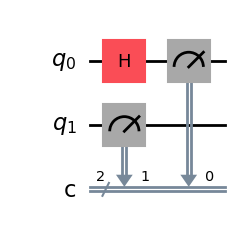

In [9]:
qc_two = QuantumCircuit(2, 2) # Create a quantum circuit with two qubits
qc_two.h(0)  # Apply Hadamard gate to qubit 0, notice we apply it to only one qubit, because we also need a control qubit
qc_two.measure([0,1], [0,1])  # measure both qubits we need to store both qubits into two list

# Simulate the result
result = simulate(qc_two)

qc_two.draw('mpl')

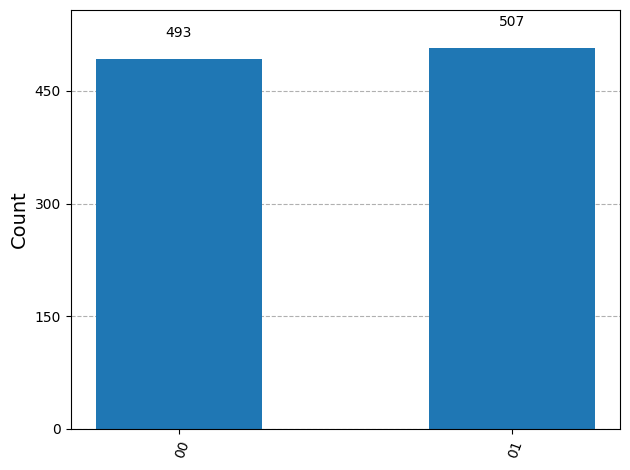

In [10]:
plot_histogram(result.get_counts())

We can see that we have one qubit only in the zero state and the other can be a superposition. The results show that we indeed have almost a 50-50 distribution between the two states.

Before we can try to simulate the entagled state, we must introduce a new gate, namely the CNOT gate. A CNOT works a bit differently than the previous gates. The CNOT gate is a two-qubit operation, one target and one control qubit. What the gate does it will flip the target qubit if the control qubit is in the state $\ket{1}$. If the control qubit is in the state $\ket{0}$, the target qubit will remain unchanged. The mathematical representation of the CNOT gate is:
$$
CNOT = \begin{bmatrix}
    1 & 0 & 0 & 0  \\
    0 & 1 & 0 & 0  \\
    0 & 0 & 0 & 1  \\
    0 & 0 & 1 & 0
\end{bmatrix}
$$
As can be seen from the mathematical description it is a 4x4 matrix, this is because it is a two qubit operation.

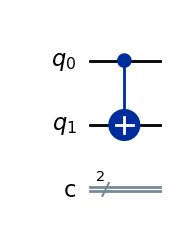

In [11]:
cnot_qc = QuantumCircuit(2,2)
cnot_qc.cx(0,1)   # Pauli x-gate on qubit 0
cnot_qc.draw('mpl')

Now with this new knowledge try to simulate an entagled state yourself.

# Tunnelling

Tunnelling is a remarkable quantum phenomenon that originates from the wave description of particles. As we have seen in the double slit experiment, a particle can be described as a wave; the mathematical tool used to do so is the **wave function**.

The potential barrier is a classic example to understand tunnelling.

<p align="center">
  <img src="images/potential_barrier.png" alt="Potential barrier" width="30%">
</p>

It consists of an energy barrier (a potential) with height $V_0$ and width $L$. In classical mechanics, when a particle with energy $E < V_0$ reaches the barrier, it cannot surmount it and would be completely reflected. In quantum mechanics, there is a nonzero probability of finding the particle on the other side: the **tunnelling effect**.

We model the particle in Region 1 as an incident wave described by a wave function $\psi_I(x)$, which splits into a reflected part $\psi_R(x)$ and a transmitted part $\psi_T(x)$:
$$\psi_I(x) = \psi_R(x) + \psi_T(x)$$

After entering Region 2 (inside the barrier), the wave decays but does not vanish immediately; encountering the far edge, part of it emerges into Region 3 as a transmitted wave. This nonzero transmission for $E < V_0$ is the tunnelling effect.